In [6]:
import requests
from html.parser import HTMLParser
import urllib.request
from selenium import webdriver
import pandas as pd
import csv
import time
import operator
import re
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
%matplotlib inline

In [4]:
!conda install --yes bs4

Solving environment: done

## Package Plan ##

  environment location: /Users/macbookpro/opt/anaconda3

  added / updated specs:
    - bs4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bs4-4.9.3                  |       hd3eb1b0_0           4 KB
    ------------------------------------------------------------
                                           Total:           4 KB

The following NEW packages will be INSTALLED:

  bs4                pkgs/main/noarch::bs4-4.9.3-hd3eb1b0_0



bs4-4.9.3            | 4 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [8]:
random.seed(50)

In [27]:
#main sourcde url 
#construction accident -> search keyword
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20191231&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#b
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20140702&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#c
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20100207&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#d
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20070626&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#e
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20040524&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#f
m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20000605&query=%22construction%22%20accident&sort=newest&startDate=20000101"

In [25]:
#main sourcde url 
#construction accident -> search keyword
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20191231&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20140702&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20100207&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20070626&query=%22construction%22%20accident&sort=newest&startDate=20000101"
#m_url = "https://www.nytimes.com/search?dropmab=false&endDate=20040524&query=%22construction%22%20accident&sort=newest&startDate=20000101"
m_url ="https://www.nytimes.com/search?dropmab=false&endDate=20000605&query=%22construction%22%20accident&sort=newest&startDate=20000101"

In [28]:

chrome_options = webdriver.ChromeOptions
#chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path='/Users/macbookpro/Project_construction/chromedriver')

link = []
driver.get(m_url)
time.sleep(3)
for i in range(110) :
    a = driver.page_source
    b = BeautifulSoup(a, 'html.parser')
    #stream-panel > div.css-13mho3u > ol > li:nth-child(1) > div > div.css-1l4spti > a
    #stream-panel > div.css-13mho3u > ol > li > div > div.css-1l4spti > a
    #site-content > div > div:nth-child(2) > div.css-46b038 > ol > li:nth-child(1) > div > div > div > a
    c = b.select('#site-content > div >div>div> ol >li> div > div > div > a')
    
    for j in range(len(c)) :
        if c[j].attrs['href'] not in link :
            link.append(c[j].attrs['href'])
        else :
            pass
    
    driver.find_element_by_xpath('//*[@id="site-content"]/div/div[2]/div[2]/div/button').click()
    time.sleep(3)

#link

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="site-content"]/div/div[2]/div[2]/div/button"}
  (Session info: chrome=88.0.4324.146)


In [29]:
#link_source = link 
#a_link = link
#b_link = link
#c_link = link
#d_link = link
#e_link = link
#f_link = link
print(len(f_link))

71


In [30]:
total_link = []
total_link.extend(a_link)
total_link.extend(b_link)
total_link.extend(c_link)
total_link.extend(d_link)
total_link.extend(e_link)
total_link.extend(f_link)


In [34]:
print(len(total_link))

print(a_link[0])
print(b_link[0])
print(c_link[0])
print(d_link[0])
print(e_link[0])
print(f_link[0])

5129
/2019/12/30/nyregion/nyc-building-violations.html?searchResultPosition=1
/2014/07/02/world/asia/4-are-rescued-days-after-building-collapse-in-india.html?searchResultPosition=1
/2010/02/08/nyregion/08explode.html?searchResultPosition=1
/2007/06/26/business/worldbusiness/26iht-26tire.6331500.html?searchResultPosition=1
/2004/05/24/world/roof-collapses-at-paris-airport-killing-5.html?searchResultPosition=1
/2000/06/04/world/living-in-the-shadow-of-chernobyl-s-reactors.html?searchResultPosition=1


In [31]:
res = []
for a in total_link :
    if a not in res :
        res.append(a)


In [32]:
len(res)

5071

In [33]:
def removing_url(s_link):

    diff_link = []

#delete unsupported news 
    for i in range (len(s_link)) :
        #print(a_link[i])
        if s_link[i][1] != '2':
        
            diff_link.append(s_link[i])
            

    for j in range(len(diff_link)):
        if diff_link[j] in s_link:
            s_link.remove(diff_link[j])
        
    
    return s_link


In [34]:
new_f=removing_url(total_link)

In [35]:
new_a = removing_url(a_link)
new_b = removing_url(b_link)
new_c = removing_url(c_link)
new_d = removing_url(d_link)
new_e = removing_url(e_link)
new_f = removing_url(f_link)



In [39]:
print("This is total link without unsupported link {}".format(len(total_link)))

This is total link without unsupported link 4535


In [40]:
## This is main source for analyzing article

class ArticleInfo():
    
    def __init__(self, s_url) :
        
        session = requests.Session()
        req=session.get(s_url)
        self.soup = BeautifulSoup(req.text, 'html.parser')
    
    
    def article_body(self) :
        body = self.soup.find('div', {'class' : 'StoryBodyCompanionColumn'})
        finalContent =''
    
        if body is not None :
            for itcontents in self.soup.findAll('p'):
                if itcontents == None :
                    continue
                content = itcontents.getText()
                content = re.sub(r"\n+", "", content)
                finalContent +=content
        else :
            return False
        
        return finalContent

    def article_title(self):
        titles = self.soup.select('title',{"data-rh":"true"})
        for title in titles:
            title = title.getText()
            break
        return title

    def article_date(self) :
  
        date = self.soup.find('li',{'class':'date'})
        if date != None :
            date = date.getText()
            
        else :
            date = self.soup.find('meta',{'name':'pdate'})
            if date !=None :
                date = date.get('content')
                if date !=None :
                    date = str(date)
                else:
                    none= "none"
                    datelist.append(none)
                
        return date

 

In [41]:
def scraping(source_link):
    titles =[]
    bodies =[]
    datelist=[]

    for s_url in source_link :
        s_url = 'https://www.nytimes.com'+s_url
        ob = ArticleInfo(s_url)
    
        body =ob.article_body()
        bodies.append(body)
    
        date = ob.article_date()
        datelist.append(date)
    
        title = ob.article_title()
        titles.append(title)
    return bodies, datelist, titles

In [42]:
print(new_a)

['/2019/12/30/nyregion/nyc-building-violations.html?searchResultPosition=1', '/2019/12/25/us/politics/trump-businesses.html?searchResultPosition=2', '/2019/12/25/world/europe/france-roundabouts-yellow-vests.html?searchResultPosition=3', '/2019/12/24/nyregion/nyc-falling-ice.html?searchResultPosition=4', '/2019/12/23/business/david-calhoun.html?searchResultPosition=5', '/2019/12/23/briefing/boeing-jamal-khashoggi-saudi-arabia-fukushima.html?searchResultPosition=6', '/2019/12/23/nyregion/falling-ice-nyc-buildings.html?searchResultPosition=7', '/2019/12/17/us/california-homeless-camp.html?searchResultPosition=8', '/2019/12/16/opinion/iraq-protests.html?searchResultPosition=9', '/2019/12/14/us/taft-cemetery-railroad-montana-boot-hill.html?searchResultPosition=10', '/2019/12/10/briefing/impeachment-trade-self-care.html?searchResultPosition=11', '/2019/12/10/opinion/impeachment-articles-trump.html?searchResultPosition=12', '/2019/12/06/world/africa/kenya-building-collapse-nairobi.html?search

In [56]:
#take a lot of time,, so run the code seperately

body, date, title = scraping(new_f)
#a_body = body
#a_date = date
#a_title = title

#b_body = body
#b_date = date
#b_title = title

#c_body = body
#c_date = date
#c_title = title

#d_body = body
#d_date = date
#d_title = title

#e_body = body
#e_date = date
#e_title = title

f_body = body
f_date = date
f_title = title

In [57]:
print(len(f_body))

71


In [58]:
import pickle

In [59]:
date_list = [a_date,b_date,c_date,d_date,e_date,f_date]
body_list = [a_body,b_body,c_body,d_body,e_body,f_body]
title_list = [a_title,b_title,c_title,d_title,e_title,f_title]
final_set = {}
final_set['date'] = []
final_set['title'] = []
final_set['body'] = []
for i in range(len(date_list)) :
    
    final_set['date'].extend(date_list[i])
    final_set['title'].extend(title_list[i])
    final_set['body'].extend(body_list[i])
    
df_nyt = pd.DataFrame(final_set, columns =["date", "title", "body"])
df_nyt.to_pickle("./nyt_df.pkl")

In [60]:
nyt = pd.read_pickle("./nyt_df.pkl")

In [63]:
df_nyt.head()

,date,title,body
0,20191230,"After Death From Falling Debris, Violations Fo...","AdvertisementSupported byThe infractions, whic..."
1,20191225,"For Trump Organization, Office Skyscrapers Mak...",AdvertisementSupported byOffice towers in New ...
2,20191225,Traffic Circles Are Everywhere in France. Not ...,AdvertisementSupported byFrance DispatchTraffi...
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,AdvertisementSupported byNew York Today By Azi...
4,20191223,Boeing Taps David Calhoun as C.E.O. to Stem 73...,"AdvertisementSupported byOver decades, as an e..."


### Start Tokenize words with nltk

In [70]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer,word_tokenize
from nltk.probability import ConditionalFreqDist

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [84]:
bodies = final_set['body']

In [71]:

#1. make lower case, regulazation
l_bodies=[]
for body in bodies :
    
    body = str(body).lower()
    l_bodies.append(body)

    
#2. removing stop words, tokenize
stop_words = set(stopwords.words('english'))

token_sentence = []
for words in l_bodies:
    word_tokens= word_tokenize(words)
    filter_sentence = [fw for fw in word_tokens if not fw in stop_words]
    
    for n in range(len(filter_sentence)) :
        if filter_sentence[n] == 'collapse' :
            filter_sentence[n]  = 'collapsed'
       
    ## fall + fell => fall (less frequency of fall just go with fell) , collapsed +collapse => collapse
    #filter_sentence = nltk.pos_tag(filter_sentence)
    token_sentence.append(filter_sentence)
    
#token_sentence
#print(l_bodies)

In [72]:
#check how many words I use 

len(token_sentence)
total_word_count = 0
for i in range(len(token_sentence)) :
    
    total_word_count += len(token_sentence[i])
print(total_word_count)
print(len(token_sentence))
print(len(l_bodies))

4969036
4535
4535


In [73]:
token_sentence[0]

['advertisementsupported',
 'bythe',
 'infractions',
 ',',
 'include',
 'dangling',
 'signs',
 'cracks',
 'walls',
 ',',
 'considered',
 'risky',
 'city',
 'said',
 'must',
 'fixed',
 'immediately.by',
 'azi',
 'paybarahafter',
 'pedestrian',
 'manhattan',
 'fatally',
 'struck',
 'piece',
 'building',
 'facade',
 ',',
 'officials',
 'month',
 'conducted',
 'surprise',
 'inspections',
 'determined',
 '220',
 'buildings',
 'city',
 'serious',
 'violations',
 'owners',
 'failed',
 'address',
 ',',
 'authorities',
 'said',
 'monday.the',
 'class',
 '1',
 'facade',
 'violations',
 '—',
 'include',
 'cracks',
 'facade',
 ',',
 'missing',
 'bricks',
 'loose',
 'masonry',
 '—',
 'considered',
 'dangerous',
 'posed',
 'threat',
 'public',
 'required',
 'building',
 'owner',
 'immediately',
 'put',
 'place',
 'protections',
 'pedestrians',
 ',',
 'spokeswoman',
 'city',
 '’',
 'department',
 'buildings',
 'said',
 '.',
 'inspection',
 'sweep',
 'came',
 'death',
 'month',
 'new',
 'york',
 'arch

In [74]:
final_set['body'] = token_sentence
df_nyt2 = pd.DataFrame(final_set, columns=["date","title","body"])
df_nyt2.head()

,date,title,body
0,20191230,"After Death From Falling Debris, Violations Fo...","[advertisementsupported, bythe, infractions, ,..."
1,20191225,"For Trump Organization, Office Skyscrapers Mak...","[advertisementsupported, byoffice, towers, new..."
2,20191225,Traffic Circles Are Everywhere in France. Not ...,"[advertisementsupported, byfrance, dispatchtra..."
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,"[advertisementsupported, bynew, york, today, a..."
4,20191223,Boeing Taps David Calhoun as C.E.O. to Stem 73...,"[advertisementsupported, byover, decades, ,, e..."


In [75]:
df_nyt2.to_pickle("./nyt2_df.pkl")

In [77]:
with open('token_sentence.pkl','wb') as f :
    pickle.dump(token_sentence,f)

In [83]:
with open('token_sentence.pkl', 'rb') as f :
    m_list = pickle.load(f)

m_list == token_sentence

True

### Basic Stats

frequency of keywords

In [85]:
from nltk.tokenize import sent_tokenize

## 1. Count Function

In [86]:
#frequency of causation

cnt_fire =0 
cnt_fall =0
cnt_collapse =0 
cnt_crane = 0
cnt_explosion = 0
cnt_struck = 0
cnt_caught = 0
cnt_electrical = 0 

for token in token_sentence :
    if 'fire' in token :
        cnt_fire +=1
    if 'collapsed' in token :
        if 'fell' not in token :
            cnt_fall +=1
        #print(token)
    if 'fell' in token :
        cnt_fall +=1
        #print(token)
    if 'crane' in token :
        cnt_crane +=1
        #print(token)
    if 'explosion' in token :
        cnt_explosion +=1
    if 'struck' in token :
        cnt_struck +=1
    if 'caught' in token :
        cnt_caught +=1
        #print(token)
    if  'electrical'in token :
        cnt_electrical += 1
    if 'electrocution' in token :
        cnt_electrical += 1
    if 'electrocuted' in token :
        cnt_electrical +=1
        
#electrocution, electrical, electrocuted  = > electrocute

freq_dict = {}
freq_dict['fire'] = cnt_fire
freq_dict['fell'] = cnt_fall
#freq_dict['collapsed'] = cnt_collapse
freq_dict['crane'] = cnt_crane
freq_dict['explosion'] = cnt_explosion
freq_dict['struck'] = cnt_struck
freq_dict['caught'] = cnt_caught
freq_dict['electrical'] = cnt_electrical


print(freq_dict)

{'fire': 1062, 'fell': 1449, 'crane': 328, 'explosion': 308, 'struck': 558, 'caught': 379, 'electrical': 227}


## 1- 1. Pie Chart by the number of keywords

{'fire': 1062, 'fell': 1449, 'crane': 328, 'explosion': 308, 'struck': 558, 'caught': 379, 'electrical': 227}
[('fell', 1449), ('fire', 1062), ('struck', 558), ('caught', 379), ('crane', 328), ('explosion', 308), ('electrical', 227)]


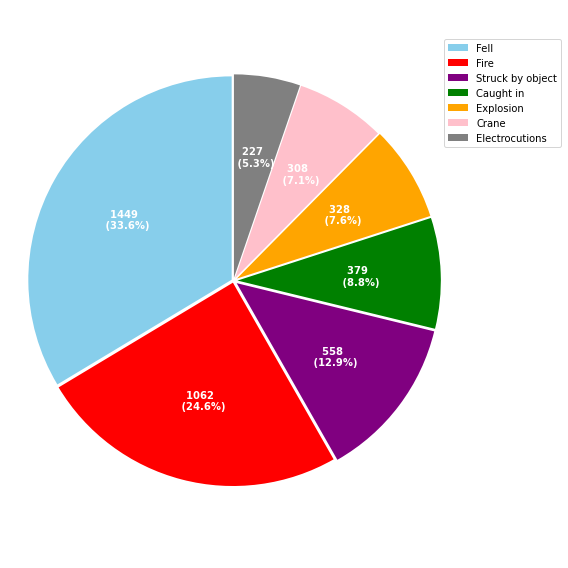

In [87]:
#frequency pie chart of five keywords

import matplotlib.pyplot as plt

print(freq_dict)

s_freq_dict = sorted(freq_dict.items(), key = lambda x:x[1], reverse = True)
print(s_freq_dict)
fig, ax = plt.subplots(figsize=(8,8))

value = []

for i in range(len(s_freq_dict)) :

    value.append(s_freq_dict[i][1])
    
keywords = ['Fell','Fire','Struck by object','Caught in','Explosion','Crane', 'Electrocutions']
colors = ['skyblue','red','purple','green','orange','pink','gray']    

def labeling(values):
    def autopct(pct) :
        all_val = sum(values)
        val = int(round(pct*all_val/100.0))
        return '{v:d} \n ({p:.1f}%)'.format(p=pct,v=val)
    return autopct

explode = [0.01,0.01,0.02,0.02,0.02,0.015,0.015]
_,_,autopcts = ax.pie(value,  autopct=labeling(value),explode = explode,colors =colors,  startangle = 90, textprops = dict(color='w') )

plt.setp(autopcts, **{'color':'white','weight':'bold', 'fontsize':10})


ax.axis('equal')

plt.legend(bbox_to_anchor=(0.95,0.95), loc='upper left', labels = keywords)
fig.tight_layout()
plt.savefig('figure/prediction/frequency_keyword_reason_0811.jpeg',dpi=300)
#Frequency of accident type keywords

## 2. frequency of day

In [ ]:
#frequency of five keywords

cnt_mon =0 
cnt_tue =0
cnt_wed =0 
cnt_thr = 0
cnt_fri = 0
cnt_sat = 0
cnt_sun = 0

for token in token_sentence :
    if 'monday' in token :
        cnt_mon +=1
    if 'tuesday' in token :
        cnt_tue +=1
    if 'wednesday' in token :
        cnt_wed +=1
    if 'thursday' in token :
        cnt_thr +=1
    if 'friday' in token :
        cnt_fri +=1
    if 'saturday' in token :
        cnt_sat +=1
    if 'sunday' in token :
        cnt_sun +=1
        
        
freq_day_dict = {}
freq_day_dict['Mon'] = cnt_mon
freq_day_dict['Tue'] = cnt_tue
freq_day_dict['Wed'] = cnt_wed
freq_day_dict['Thu'] = cnt_thr
freq_day_dict['Fri'] = cnt_fri
freq_day_dict['Sat'] = cnt_sat
freq_day_dict['Sun'] = cnt_sun

print(freq_day_dict)




## 2-1 bar chart with frequency of the day

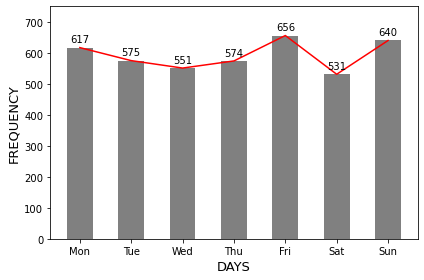

In [89]:
#autolabel

def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#frequency histogram of days keywords


fig, ax = plt.subplots()
rect = ax.bar(list(freq_day_dict.keys()),freq_day_dict.values(),width = 0.5, color ='gray')
ax.plot(list(freq_day_dict.keys()),list(freq_day_dict.values()), color = 'red')
ax.set_ylabel('FREQUENCY', fontsize = 13)
ax.set_xlabel('DAYS', fontsize =13)
ax.set_ylim(0,750)

autolabel(rect)


#plt.title("Frequency of days")
fig.tight_layout()
#plt.savefig('figure/prediction/current/frequency_day.jpeg',dpi=300)

## 3. Distribution by weather

In [92]:
def generate_by_weather(df_article) :
    weather =[]
    month = []
    years = []
    if "weather" and "month" and "year" in df_article.columns:
        df_article = df_article.drop(["weather","month","year"], axis = 1)
    for i in range(len(df_article)) :
    
        if df_article.loc[i,'date'] is None :
            weather.append('None')
            month.append('None')
       
            years.append('None')
        else :
            
            year =df_article.loc[i,"date"][:4]
            years.append(year)
              
            if df_article.loc[i,"date"][4:6] == '03':
                weather.append('spring')
                month.append('march')
                
            elif df_article.loc[i,"date"][4:6] == '04' :
                weather.append('spring')
                month.append('april')
                
            elif df_article.loc[i,"date"][4:6] == '05' :
                weather.append('spring')
                month.append('may')
                
            elif df_article.loc[i,"date"][4:6] == "06" :
                weather.append('summer')
                month.append('june')
                
            elif df_article.loc[i,"date"][4:6] == "07" :
                weather.append('summer')
                month.append('july')
                
            elif df_article.loc[i,"date"][4:6] == "08" :
                weather.append('summer')
                month.append('august')
                
            elif df_article.loc[i,"date"][4:6] == "09" :
                weather.append('fall')
                month.append('september')
                
            elif df_article.loc[i,"date"][4:6] == "10" :
                weather.append('fall')
                month.append('october')
               
            elif df_article.loc[i,"date"][4:6] == "11" :
                weather.append('fall')
                month.append('november')
                
            elif df_article.loc[i,"date"][4:6] == "12" :
                weather.append('winter')
                month.append('december')
              
            elif df_article.loc[i,"date"][4:6] == "01" :
                weather.append('winter')
                month.append('january')
                
            elif df_article.loc[i,"date"][4:6] == "02" :
                weather.append('winter')
                month.append('february')
               
            else :
                weather.append('error')
                

    print(len(weather))
    print(len(years))
    
    
    df_article.insert(3, "weather", weather)
    df_article.insert(4, "month", month)
    df_article.insert(5,"year",years)
    
    return df_article

In [93]:
df_arrange = generate_by_weather(df_nyt)

df_arrange.head()


4535
4535


,date,title,body,weather,month,year
0,20191230,"After Death From Falling Debris, Violations Fo...","AdvertisementSupported byThe infractions, whic...",winter,december,2019
1,20191225,"For Trump Organization, Office Skyscrapers Mak...",AdvertisementSupported byOffice towers in New ...,winter,december,2019
2,20191225,Traffic Circles Are Everywhere in France. Not ...,AdvertisementSupported byFrance DispatchTraffi...,winter,december,2019
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,AdvertisementSupported byNew York Today By Azi...,winter,december,2019
4,20191223,Boeing Taps David Calhoun as C.E.O. to Stem 73...,"AdvertisementSupported byOver decades, as an e...",winter,december,2019


## 4. Distribution by year

In [94]:
def get_dist_year(df) :
    
    year_set ={}
    for i in range(len(df)) :
        current = df.loc[i,"year"]
        if current not in year_set :
            year_set[current] = 1
        else : 
            year_set[current] +=1
    
    return year_set
    
    

In [95]:
dist_year = get_dist_year(df_arrange)
sort_year = sorted(dist_year.items())
sort_year

o_year = [sets[0] for sets in sort_year]
o_freq = [sets[1] for sets in sort_year]
#o_year,o_freq

In [96]:
dist_year

{'2019': 136,
 '2018': 133,
 '2017': 133,
 '2016': 149,
 '2015': 165,
 '2014': 213,
 '2013': 202,
 '2012': 125,
 '2011': 168,
 '2010': 186,
 '2009': 258,
 '2008': 356,
 '2007': 406,
 '2006': 424,
 '2005': 192,
 '2004': 384,
 'None': 18,
 '2003': 195,
 '2002': 199,
 '2001': 222,
 '2000': 271}

## 4-1 Comparing with gov data

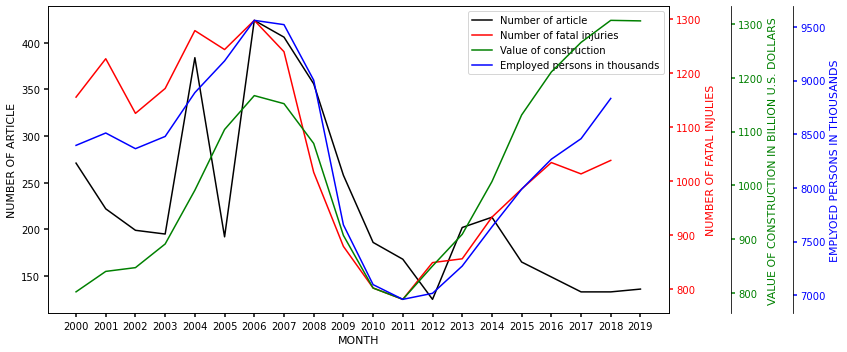

In [131]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, graph = plt.subplots(figsize=(12,5))
#fig.subplots_adjust(right=0.75)

ax1 = graph.twinx()
ax2 = graph.twinx()
ax3 = graph.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
ax2.spines["right"].set_position(("axes", 1.1))
ax3.spines['right'].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(ax2)
make_patch_spines_invisible(ax3)
# Second, show the right spine.
ax2.spines["right"].set_visible(True)
ax3.spines['right'].set_visible(True)

p1, = graph.plot(o_year[:-1], o_freq[:-1], color = "black", label="Number of article")
p2, = ax1.plot(o_year[:-1], true_list, "r-", label="Number of fatal injuries")
p3, = ax2.plot(o_year[:-1], cs_spending, "g-", label="Value of construction")
p4, = ax3.plot(o_year[:-1], number_of_worker ,color = "blue", label = "Employed persons in thousands")



#graph.set_xlim(0, 2)
#graph.set_ylim(0, 2)
#ax1.set_ylim(0, 4)
#ax2.set_ylim(1, 65)
#ax3.set_ylim

graph.set_xlabel("MONTH", fontsize = 11)
graph.set_ylabel("NUMBER OF ARTICLE", fontsize = 11)
ax1.set_ylabel("NUMBER OF FATAL INJULIES", fontsize = 11)
ax2.set_ylabel("VALUE OF CONSTRUCTION IN BILLION U.S. DOLLARS", fontsize = 11)
ax3.set_ylabel('EMPLYOED PERSONS IN THOUSANDS', fontsize = 11)


graph.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)

graph.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax1.tick_params(axis='y', colors=p2.get_color(), **tkw)
ax2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax3.tick_params(axis='y', colors = p4.get_color(), **tkw)
graph.tick_params(axis='x', **tkw)

lines = [p1, p2, p3,p4]


graph.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()

plt.savefig('Figure/prediction/year_distribution_comparison_ex1.jpeg', dpi=300)

plt.show()

## 5. Distrubution of weather(three months term)

In [99]:
def get_dist_weather(df) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            winter_cnt +=1
        else :
            none_cnt +=1
    
    fin_set = {}
    fin_set['Spring(Mar-May)'] = spring_cnt
    fin_set['Summer(Jun-Aug)'] = summer_cnt
    fin_set['Fall(Sep-Nov)'] = fall_cnt
    fin_set['Winter(Dec-Feb)'] = winter_cnt
    fin_set['none'] = none_cnt
    
    return fin_set


## 5-1 barchart for weather in three months term

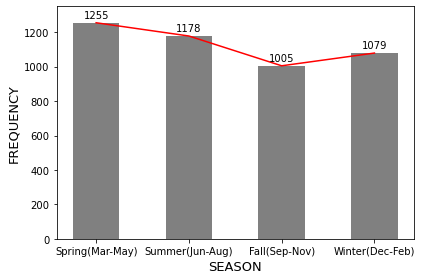

In [101]:
dist_weather = get_dist_weather(df_arrange)


fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_weather.keys())[:-1],list(dist_weather.values())[:-1],width = 0.5, color ='gray')
ax.plot(list(dist_weather.keys())[:-1], list(dist_weather.values())[:-1], color = 'red')
ax.set_ylabel('FREQUENCY', fontsize = 13)
ax.set_xlabel('SEASON', fontsize = 13)
ax.set_ylim(0,1350)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")
#plt.title("total construction accident article by weather")
fig.tight_layout()


#plt.savefig('Figure/prediction/current/weather_distribution.jpeg', dpi=300)


## 6. Distrubution of weather with causation

In [102]:
def get_dist_weather_keyword(df,key) :
    spring_cnt = 0
    summer_cnt =0
    fall_cnt =0
    winter_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"weather"] =='spring' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                spring_cnt +=1
        elif df.loc[i,"weather"] =='summer' :
            if key in df.loc[i,"body"] :
                summer_cnt +=1
        elif df.loc[i,"weather"] =='fall' :
            if key in df.loc[i,"body"] :
                fall_cnt +=1
        elif df.loc[i,"weather"] =='winter' :
            if key in df.loc[i,"body"] :
                winter_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_fire = {}
    fin_set_fire['spring'] = spring_cnt
    fin_set_fire['summer'] = summer_cnt
    fin_set_fire['fall'] = fall_cnt
    fin_set_fire['winter'] = winter_cnt
    fin_set_fire['none'] = none_cnt
    
    return fin_set_fire


In [103]:
get_dist_weather_keyword(df_arrange,"electric")


{'spring': 198, 'summer': 202, 'fall': 151, 'winter': 203, 'none': 0}

## 7. Distribution by month

In [104]:
def get_dist_month(df) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
       
            jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
        
            feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
        
            mar_cnt +=1
        elif df.loc[i,"month"] =='april' :
   
            apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
     
            may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            
            jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
          
            jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
           
            aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
          
            sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
           
            ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            
            nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            
            dec_cnt +=1
        else :
            none_cnt +=1
    
    fin_set_mon = {}
    fin_set_mon['Jan'] = jan_cnt
    fin_set_mon['Feb'] = feb_cnt
    fin_set_mon['Mar'] = mar_cnt
    fin_set_mon['Apr'] = apr_cnt
    fin_set_mon['May'] = may_cnt
    fin_set_mon['Jun'] = jun_cnt
    fin_set_mon['Jul'] = jul_cnt
    fin_set_mon['Aug'] = aug_cnt
    fin_set_mon['Sep'] = sep_cnt
    fin_set_mon['Oct'] = ocb_cnt
    fin_set_mon['Nov'] = nov_cnt
    fin_set_mon['Dec'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


## 7-1 Barchart with distribution by month

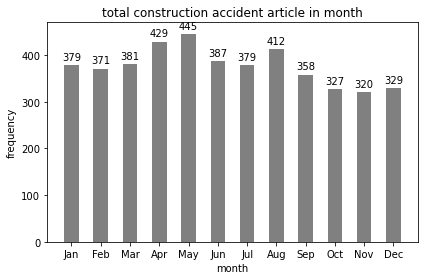

In [105]:
dist_month = get_dist_month(df_arrange)

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month.keys())[:-1],list(dist_month.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,470)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1])
plt.title("total construction accident article in month")
plt.tight_layout()
#plt.savefig('Figure/prediction/month_distribution.png')
plt.show()

## 8. Distribution by causation monthly

In [107]:
def get_dist_month_keyword(df,key) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jan_cnt +=1
                else :
                    jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    feb_cnt +=1
                else :
                    feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    mar_cnt +=1
                else :
                    mar_cnt +=1
                
        elif df.loc[i,"month"] =='april' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    apr_cnt +=1
                else :
                    apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    may_cnt +=1
                else :
                    may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jun_cnt +=1
                else :
                    jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jul_cnt +=1
                else :
                    jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    aug_cnt +=1
                else :
                    aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    sep_cnt +=1
                else :
                    sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    ocb_cnt +=1
                else :
                    ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    nov_cnt +=1
                else :
                    nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    dec_cnt +=1
                else :
                    dec_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_mon = {}
    fin_set_mon['Jan'] = jan_cnt
    fin_set_mon['Feb'] = feb_cnt
    fin_set_mon['Mar'] = mar_cnt
    fin_set_mon['Apr'] = apr_cnt
    fin_set_mon['May'] = may_cnt
    fin_set_mon['Jun'] = jun_cnt
    fin_set_mon['Jul'] = jul_cnt
    fin_set_mon['Aug'] = aug_cnt
    fin_set_mon['Sep'] = sep_cnt
    fin_set_mon['Oct'] = ocb_cnt
    fin_set_mon['Nov'] = nov_cnt
    fin_set_mon['Dec'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


In [108]:
get_dist_month_keyword(df_arrange,'electric')

{'Jan': 75,
 'Feb': 68,
 'Mar': 48,
 'Apr': 77,
 'May': 73,
 'Jun': 52,
 'Jul': 66,
 'Aug': 84,
 'Sep': 55,
 'Oct': 49,
 'Nov': 47,
 'Dec': 60,
 'none': 0}

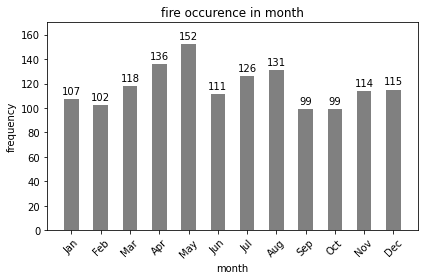

In [112]:
dist_month_fire = get_dist_month_keyword(df_arrange,'fire')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_fire.keys())[:-1],list(dist_month_fire.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,170)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("fire occurence in month")
fig.tight_layout()
#plt.savefig('Figure/prediction/month_fire_distribution.png')
plt.show()

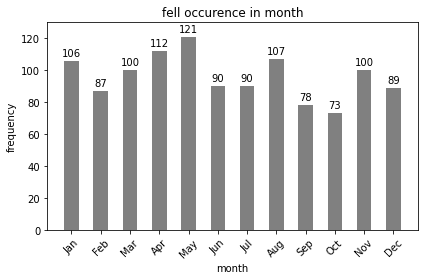

In [115]:
dist_month_fell = get_dist_month_keyword(df_arrange,'fell')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_fell.keys())[:-1],list(dist_month_fell.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,130)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("fell occurence in month")
fig.tight_layout()
#plt.savefig('Figure/prediction/month_fell_distribution.png')
plt.show()

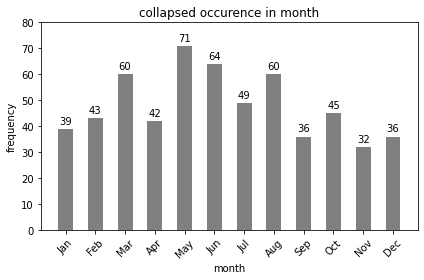

In [118]:
dist_month_collapse = get_dist_month_keyword(df_arrange,'collapsed')

fig, ax = plt.subplots()
rect1 = ax.bar(list(dist_month_collapse.keys())[:-1],list(dist_month_collapse.values())[:-1],width = 0.5, color ='gray')
ax.set_ylabel('frequency')
ax.set_xlabel('month')

ax.set_ylim(0,80)


autolabel(rect1)        
        
#plt.title("Frequency of keywords")

plt.xticks(list(dist_month.keys())[:-1], rotation= 45)
plt.title("collapsed occurence in month")
fig.tight_layout()
#plt.savefig('Figure/prediction/month_collapse_distribution.png')
plt.show()

In [119]:
causation = ['fire','collapsed', 'fell', 'crane','explosion','struck','caught','electrical']

cause_set ={}
for cause in causation :
    set_key = get_dist_month_keyword(df_arrange, cause)
    cause_set[cause]=set_key

In [120]:
extras = ["electrocuted", 'electrocution']

for extra in extras:
    key = get_dist_month_keyword(df_arrange, extra)
    origin =cause_set['electrical']
    #print(key)
    origin = {k: key.get(k,0) + origin.get(k,0) for k in set(key) | set(origin)}

cause_set['electrical'].update(origin)

In [121]:
#update fell + collpased = > fell

key1 = get_dist_month_keyword(df_arrange, 'collapsed')
f_origin = cause_set['fell']
f_origin = {k: key1.get(k,0) + f_origin.get(k,0) for k in set(key1) | set(f_origin)}

cause_set['fell'].update(f_origin)

In [111]:
cause_set

{'fire': {'Jan': 70,
  'Feb': 80,
  'Mar': 94,
  'Apr': 81,
  'May': 126,
  'Jun': 99,
  'Jul': 96,
  'Aug': 88,
  'Sep': 81,
  'Oct': 68,
  'Nov': 82,
  'Dec': 87,
  'none': 0},
 'collapsed': {'Jan': 58,
  'Feb': 57,
  'Mar': 85,
  'Apr': 74,
  'May': 105,
  'Jun': 98,
  'Jul': 78,
  'Aug': 81,
  'Sep': 56,
  'Oct': 68,
  'Nov': 46,
  'Dec': 61,
  'none': 0},
 'fell': {'Jan': 121,
  'Feb': 114,
  'Mar': 159,
  'Apr': 149,
  'May': 197,
  'Jun': 163,
  'Jul': 147,
  'Aug': 162,
  'Sep': 113,
  'Oct': 121,
  'Nov': 125,
  'Dec': 120,
  'none': 0},
 'crane': {'Jan': 18,
  'Feb': 17,
  'Mar': 51,
  'Apr': 38,
  'May': 47,
  'Jun': 48,
  'Jul': 22,
  'Aug': 21,
  'Sep': 21,
  'Oct': 20,
  'Nov': 15,
  'Dec': 11,
  'none': 0},
 'explosion': {'Jan': 18,
  'Feb': 36,
  'Mar': 22,
  'Apr': 32,
  'May': 24,
  'Jun': 26,
  'Jul': 26,
  'Aug': 33,
  'Sep': 29,
  'Oct': 22,
  'Nov': 23,
  'Dec': 30,
  'none': 0},
 'struck': {'Jan': 34,
  'Feb': 45,
  'Mar': 49,
  'Apr': 43,
  'May': 67,
  'Jun': 4

In [122]:
causation

['fire',
 'collapsed',
 'fell',
 'crane',
 'explosion',
 'struck',
 'caught',
 'electrical']

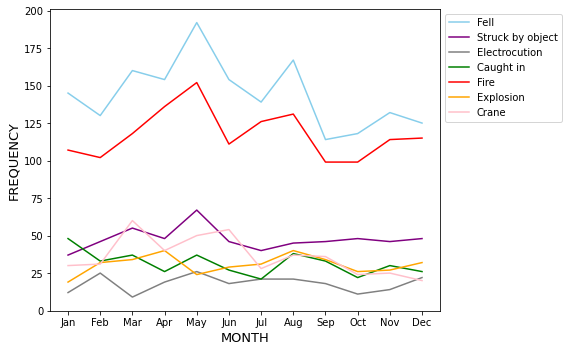

In [123]:



fig, ax = plt.subplots(figsize=(8,5))
#plt.plot(list(cause_set['collapsed'].keys())[:-1], list(cause_set['collapsed'].values())[:-1], color = 'red',label="collapsed")
ax.plot(list(cause_set['fell'].keys())[:-1],list(cause_set['fell'].values())[:-1],color ='skyblue', label ="Fell")
ax.plot(list(cause_set['struck'].keys())[:-1],list(cause_set['struck'].values())[:-1],color ='purple', label ="Struck by object")
ax.plot(list(cause_set['electrical'].keys())[:-1], list(cause_set['electrical'].values())[:-1],color = "gray", label = 'Electrocution')
ax.plot(list(cause_set['caught'].keys())[:-1],list(cause_set['caught'].values())[:-1],color ='green', label ="Caught in")
ax.plot(list(cause_set['fire'].keys())[:-1],list(cause_set['fire'].values())[:-1],color ='red', label = "Fire")
ax.plot(list(cause_set['explosion'].keys())[:-1],list(cause_set['explosion'].values())[:-1],color ='orange', label ="Explosion")
ax.plot(list(cause_set['crane'].keys())[:-1],list(cause_set['crane'].values())[:-1],color ='pink', label ="Crane")

#maxmin={}

#for i in causation :
#    i  = str(i)
#    a = list(cause_set[i].values()[:-1])
#    maxmin[i] =max(a)
#    maxmin[i] =min(a)
    
    
#plt.ylim(0,120)



plt.xlabel("MONTH",fontsize = 13)
plt.ylabel("FREQUENCY", fontsize = 13)
plt.xticks(list(dist_month.keys())[:-1])
#plt.title('causation comparison')
plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.tight_layout()
#plt.savefig('Figure/prediction/causation_comparison_by_month.jpeg',dpi=300)







In [124]:
maxmin={}

for i in causation :
    a = list(cause_set[i].values())[:-1]
    
    print(a)
    maxmin[i] =(max(a),a.index(max(a))+1,min(a), a.index(min(a))+1)


[107, 102, 118, 136, 152, 111, 126, 131, 99, 99, 114, 115]
[39, 43, 60, 42, 71, 64, 49, 60, 36, 45, 32, 36]
[145, 130, 160, 154, 192, 154, 139, 167, 114, 118, 132, 125]
[30, 31, 60, 40, 50, 54, 28, 37, 36, 24, 25, 20]
[19, 32, 34, 40, 24, 29, 31, 40, 34, 26, 27, 32]
[37, 46, 55, 48, 67, 46, 40, 45, 46, 48, 46, 48]
[48, 33, 37, 26, 37, 27, 21, 38, 33, 22, 30, 26]
[12, 25, 9, 19, 26, 18, 21, 21, 18, 11, 14, 22]


In [125]:
maxmin

#ignore collapsed

{'fire': (152, 5, 99, 9),
 'collapsed': (71, 5, 32, 11),
 'fell': (192, 5, 114, 9),
 'crane': (60, 3, 20, 12),
 'explosion': (40, 4, 19, 1),
 'struck': (67, 5, 37, 1),
 'caught': (48, 1, 21, 7),
 'electrical': (26, 5, 9, 3)}

In [126]:
df_arrange.head()

,date,title,body,weather,month,year
0,20191230,"After Death From Falling Debris, Violations Fo...","AdvertisementSupported byThe infractions, whic...",winter,december,2019
1,20191225,"For Trump Organization, Office Skyscrapers Mak...",AdvertisementSupported byOffice towers in New ...,winter,december,2019
2,20191225,Traffic Circles Are Everywhere in France. Not ...,AdvertisementSupported byFrance DispatchTraffi...,winter,december,2019
3,20191224,Why Ice Is Falling From Glass Skyscrapers - Th...,AdvertisementSupported byNew York Today By Azi...,winter,december,2019
4,20191223,Boeing Taps David Calhoun as C.E.O. to Stem 73...,"AdvertisementSupported byOver decades, as an e...",winter,december,2019


## 8. Distribution by yeanr and keyword

In [127]:
def get_dist_month_yandk(df,year,key) :
    jan_cnt = 0
    feb_cnt = 0 
    mar_cnt = 0
    apr_cnt = 0 
    may_cnt = 0 
    jun_cnt = 0
    jul_cnt = 0
    aug_cnt = 0
    sep_cnt = 0
    ocb_cnt = 0
    nov_cnt = 0
    dec_cnt = 0
    none_cnt = 0
    year = str(year)
    df = df.loc[df['year']==year]
    df.index = range(len(df))
    #print(len(df))
    #print(df.head(20))
    for i in range(len(df)) :
        if df.loc[i,"month"] =='january' :
            #print(type(df.loc[i,"bodies"]))
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jan_cnt +=1
                else :
                    jan_cnt +=1
        elif df.loc[i,"month"] =='february' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    feb_cnt +=1
                else :
                    feb_cnt +=1
        elif df.loc[i,"month"] =='march' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    mar_cnt +=1
                else :
                    mar_cnt +=1
                
        elif df.loc[i,"month"] =='april' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    apr_cnt +=1
                else :
                    apr_cnt +=1
        elif df.loc[i,"month"] =='may' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    may_cnt +=1
                else :
                    may_cnt +=1
        elif df.loc[i,"month"] =='june' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jun_cnt +=1
                else :
                    jun_cnt +=1
        elif df.loc[i,"month"] =='july' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    jul_cnt +=1
                else :
                    jul_cnt +=1
        elif df.loc[i,"month"] =='august' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    aug_cnt +=1
                else :
                    aug_cnt +=1
        elif df.loc[i,"month"] =='september' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    sep_cnt +=1
                else :
                    sep_cnt +=1
        elif df.loc[i,"month"] =='october' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    ocb_cnt +=1
                else :
                    ocb_cnt +=1
        elif df.loc[i,"month"] =='november' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    nov_cnt +=1
                else :
                    nov_cnt +=1
        elif df.loc[i,"month"] =='december' :
            if key in df.loc[i,"body"] :
                if key =='collapsed' and 'fell' not in df.loc[i,"body"] :
                    dec_cnt +=1
                else :
                    dec_cnt +=1
        else :
                none_cnt +=0
    
    fin_set_mon = {}
    fin_set_mon[year+'-01'] = jan_cnt
    fin_set_mon[year+'-02'] = feb_cnt
    fin_set_mon[year+'-03'] = mar_cnt
    fin_set_mon[year+'-04'] = apr_cnt
    fin_set_mon[year+'-05'] = may_cnt
    fin_set_mon[year+'-06'] = jun_cnt
    fin_set_mon[year+'-07'] = jul_cnt
    fin_set_mon[year+'-08'] = aug_cnt
    fin_set_mon[year+'-09'] = sep_cnt
    fin_set_mon[year+'-10'] = ocb_cnt
    fin_set_mon[year+'-11'] = nov_cnt
    fin_set_mon[year+'-12'] = dec_cnt
    fin_set_mon['none'] = none_cnt
    
    
    return fin_set_mon


## Generating Timeseries data

In [128]:
dist_yandk = {}
total_list =[]
t_value =[]
for yr in range(2000,2020):
    dist_yandk[yr] = get_dist_month_yandk(df_arrange,yr,'fire')
    total_list.extend(list(dist_yandk[yr])[:-1])
    t_value.extend(list(dist_yandk[yr].values())[:-1])

#print(dist_yandk)
#print(total_list)
#print(t_value)

In [133]:
def gen_ts_data(keyword) :
    dist_yandk={}
    total_list=[]
    t_value=[]
    
    for yr in range(2000, 2020) :
        dist_yandk[yr] = get_dist_month_yandk(df_arrange,yr, keyword)
        total_list.extend(list(dist_yandk[yr])[:-1])
        t_value.extend(list(dist_yandk[yr].values())[:-1])
    
    # dates,values 
    return total_list, t_value

In [92]:
#80 percent 2015 


n_dates = dates.to_pydatetime()
date_list = []
for i in range(len(n_dates)) :
    date_list.append(n_dates[i].strftime('%Y-%m-%d'))
    
#print(n_dates)    
print(date_list)


NameError: name 'dates' is not defined

In [105]:

## functions forformatting data 

def gen_ts_data(keyword) :
    dist_yandk={}
    total_list=[]
    t_value=[]
    
    for yr in range(2000, 2020) :
        dist_yandk[yr] = get_dist_month_yandk(df_arrange,yr, keyword)
        total_list.extend(list(dist_yandk[yr])[:-1])
        t_value.extend(list(dist_yandk[yr].values())[:-1])
    
    # dates,values 
    return total_list, t_value


#converting to class __init__ 
#global variable 

dates = pd.date_range('2000-01-01', '2019-12-31', freq='M')

def trans_date(dates) :
    n_dates = dates.to_pydatetime()
    date_list = []
    
    for i in range(len(n_dates)) :
        date_list.append(n_dates[i].strftime('%Y-%m-%d'))
    
    #formatted date_list['2019-12-31']
    return date_list

def convert_df(dates, values) :
    df = pd.DataFrame({'date': dates, 'freq' : values})
    df['date']  = pd.to_datetime(df['date'], format = '%Y-%m-%d')
    df = df.set_index('date')
    
    return df

#plotting for train and test
# return train and test 

def plotting(df) :
    
    #80percent point
    split_date = pd.Timestamp('31-12-2015')

    train = df.loc[:split_date, ['freq']]
    test = df.loc[split_date:, ['freq']]

    ax = train.plot()
    test.plot(ax=ax)
    
    #plt.yscale('log')
    plt.legend(['train', 'test'])
    
    return train, test



## fire

In [94]:
t_list , fire_value = gen_ts_data('fire')

df_fire = convert_df(dates,fire_value )


df_fire


,freq
date,
2000-01-31,4
2000-02-29,3
2000-03-31,2
2000-04-30,5
2000-05-31,12
...,...
2019-08-31,5
2019-09-30,5
2019-10-31,4


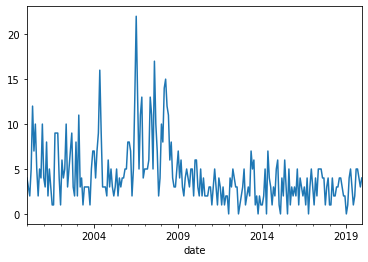

In [100]:
df_fire['freq'].plot()

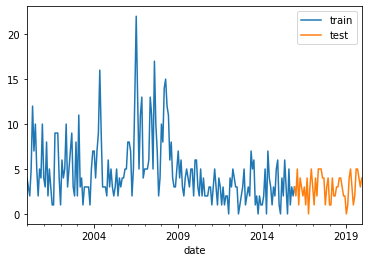

In [106]:
fire_train, fire_test = plotting(df_fire)

## fell

240


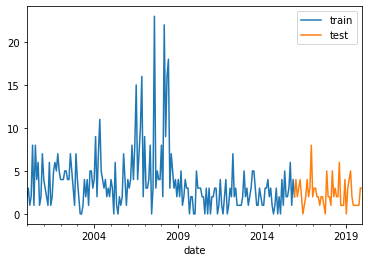

In [107]:
total_list, fell_value = gen_ts_data('fell')
fell_df = convert_df(dates, fell_value)
fell_train, fell_test = plotting(fell_df)

print(len(fell_df))

# caught

In [132]:
t_list, coll_value = gen_ts_data('caught')
coll_df = convert_df(dates, coll_value)
coll_train, coll_test = plotting(coll_df)

NameError: name 'gen_ts_data' is not defined

# electrical

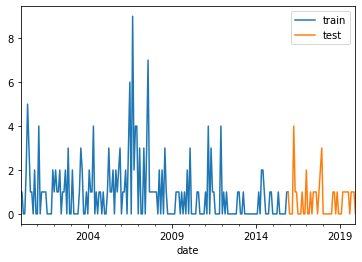

In [109]:
t_list, elec_value = gen_ts_data('electrical')
elec_df = convert_df(dates, elec_value)
elec_train, elec_test = plotting(elec_df)

# struck

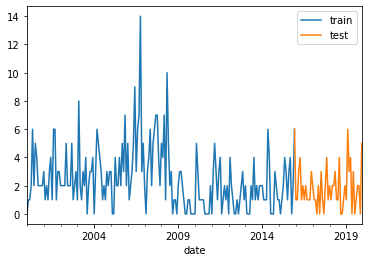

In [110]:
t_list, struck_value = gen_ts_data('struck')
struck_df = convert_df(dates, struck_value)
struck_train, struck_test = plotting(struck_df)

## LSTM


In [143]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

In [235]:
def scaling(train, test) :
    sc = MinMaxScaler()
    train_sc = sc.fit_transform(train)
    test_sc = sc.transform(test)
    
    return train_sc, test_sc

def scale_df(train_sc, test_sc,idx_train, idx_test) :
    train_sc_df = pd.DataFrame(train_sc, columns=['freq'], index =idx_train.index)
    test_sc_df = pd.DataFrame(test_sc, columns=['freq'], index = idx_test.index)
    
    return train_sc_df, test_sc_df

#sc = scaleed

def shifting(train_sc_df, test_sc_df, ranging) :
    for idx in range(1, ranging) :
        train_sc_df['shift_{}'.format(idx)] = train_sc_df['freq'].shift(idx)
        test_sc_df['shift_{}'.format(idx)] = test_sc_df['freq'].shift(idx)
        
    return train_sc_df, test_sc_df

def cleaning(train_sc_df, test_sc_df) :
    X_train = train_sc_df.dropna().drop('freq', axis = 1)
    Y_train = train_sc_df.dropna()[['freq']]
    
    #X_train = train_sc_df.drop('freq', axis = 1)
    #Y_train = train_sc_df[['freq']]
    
    
    X_test = test_sc_df.dropna().drop('freq', axis = 1)
    Y_test = test_sc_df.dropna()[['freq']]
    
    #X_test = test_sc_df.drop('freq', axis =1)
    #Y_test = test_sc_df[['freq']]
    
    X_train = X_train.values
    X_test = X_test.values
    Y_train = Y_train.values
    Y_test = Y_test.values
    
    return X_train, X_test, Y_train, Y_test

def converting(X_train, X_test, dim) :
    
    X_train_t = X_train.reshape(X_train.shape[0],dim,1)
    X_test_t = X_test.reshape(X_test.shape[0],dim,1)
      
    return X_train_t, X_test_t

In [452]:
def data_prep(train, test) :
    f_train_sc, f_test_sc=scaling(train, test)
    f_train_sc_df, f_test_sc_df = scale_df(f_train_sc, f_test_sc, train, test)
    f_train_sc_df, f_test_sc_df = shifting(f_train_sc_df, f_test_sc_df, 13)
    f_x_train, f_x_test, f_y_train, f_y_test =cleaning(f_train_sc_df, f_test_sc_df)
    f_x_train_t, f_x_test_t = converting(f_x_train, f_x_test, 12)
    
    return f_x_train, f_x_test, f_y_train, f_y_test, f_x_train_t, f_x_test_t, f_test_sc_df

In [243]:
f_test_sc_df.dropna().drop('freq', axis=1)

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2016-12-31,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364,0.181818,0.045455,0.227273,0.090909,0.136364
2017-01-31,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364,0.181818,0.045455,0.227273,0.090909
2017-02-28,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364,0.181818,0.045455,0.227273
2017-03-31,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364,0.181818,0.045455
2017-04-30,0.181818,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364,0.181818
2017-05-31,0.090909,0.181818,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909,0.136364
2017-06-30,0.227273,0.090909,0.181818,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364,0.090909
2017-07-31,0.227273,0.227273,0.090909,0.181818,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455,0.136364
2017-08-31,0.227273,0.227273,0.227273,0.090909,0.181818,0.045455,0.136364,0.227273,0.136364,0.000000,0.181818,0.045455


In [511]:
f_x_train, f_x_test, f_y_train, f_y_test, f_x_train_t, f_x_test_t, f_test_sc_df = data_prep(fire_train, fire_test)
  

In [512]:
f_test_sc_df.describe()

,freq,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,49.000000,48.000000,47.000000,46.000000,45.000000,44.000000,43.000000,42.000000,41.000000,40.000000,39.000000,38.000000,37.000000
mean,0.134508,0.133523,0.133462,0.132411,0.130303,0.128099,0.128964,0.130952,0.130820,0.128409,0.127040,0.129187,0.132678
std,0.066234,0.066571,0.067289,0.067642,0.066860,0.065959,0.066487,0.065986,0.066800,0.065820,0.066100,0.065595,0.062818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
50%,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364
75%,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
max,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273


## fire

In [1505]:
#train_sc_df = pd.DataFrame(train_sc, columns= ['freq'], index = train.index)
#test_sc_df = pd.DataFrame(test_sc, columns = ['freq'], index = test.index)
#train_sc_df.head()

,freq
date,
2000-01-31,0.181818
2000-02-29,0.136364
2000-03-31,0.090909
2000-04-30,0.181818
2000-05-31,0.272727


In [1506]:
#for idx in range(1, 13):
#    train_sc_df['shift_{}'.format(idx)]= train_sc_df['freq'].shift(idx)
#    test_sc_df['shift_{}'.format(idx)] = test_sc_df['freq'].shift(idx)
#train_sc_df.head(13)

,freq,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2000-01-31,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,0.272727,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,0.272727,0.272727,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,0.454545,0.272727,0.272727,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,0.227273,0.454545,0.272727,0.272727,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN,NaN
2000-09-30,0.090909,0.227273,0.454545,0.272727,0.272727,0.181818,0.090909,0.136364,0.181818,NaN,NaN,NaN,NaN


In [1507]:
#X_train = train_sc_df.dropna().drop('freq', axis =1)
#Y_train = train_sc_df.dropna()[['freq']]

#X_test = test_sc_df.dropna().drop('freq', axis = 1)
#Y_test = test_sc_df.dropna()[['freq']]

#X_train.head()
#print(Y_test)

                freq
date                
2016-12-31  0.227273
2017-01-31  0.136364
2017-02-28  0.045455
2017-03-31  0.181818
2017-04-30  0.090909
2017-05-31  0.227273
2017-06-30  0.227273
2017-07-31  0.227273
2017-08-31  0.181818
2017-09-30  0.181818
2017-10-31  0.045455
2017-11-30  0.136364
2017-12-31  0.181818
2018-01-31  0.045455
2018-02-28  0.045455
2018-03-31  0.181818
2018-04-30  0.090909
2018-05-31  0.090909
2018-06-30  0.136364
2018-07-31  0.136364
2018-08-31  0.181818
2018-09-30  0.181818
2018-10-31  0.181818
2018-11-30  0.090909
2018-12-31  0.090909
2019-01-31  0.000000
2019-02-28  0.045455
2019-03-31  0.227273
2019-04-30  0.227273
2019-05-31  0.181818
2019-06-30  0.045455
2019-07-31  0.090909
2019-08-31  0.227273
2019-09-30  0.227273
2019-10-31  0.272727
2019-11-30  0.136364
2019-12-31  0.181818


In [1508]:

#X_train = X_train.values
#X_test = X_test.values
#Y_train = Y_train.values
#Y_test = Y_test.values

#print(X_train.shape)
#print(Y_train.shape)
#print(Y_test)

(180, 12)
(180, 1)
[[0.22727273]
 [0.13636364]
 [0.04545455]
 [0.18181818]
 [0.09090909]
 [0.22727273]
 [0.22727273]
 [0.22727273]
 [0.18181818]
 [0.18181818]
 [0.04545455]
 [0.13636364]
 [0.18181818]
 [0.04545455]
 [0.04545455]
 [0.18181818]
 [0.09090909]
 [0.09090909]
 [0.13636364]
 [0.13636364]
 [0.18181818]
 [0.18181818]
 [0.18181818]
 [0.09090909]
 [0.09090909]
 [0.        ]
 [0.04545455]
 [0.22727273]
 [0.22727273]
 [0.18181818]
 [0.04545455]
 [0.09090909]
 [0.22727273]
 [0.22727273]
 [0.27272727]
 [0.13636364]
 [0.18181818]]


## 3-dimentional data converting

In [1509]:
import numpy as np

X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

In [1510]:
print(X_train_t.shape)
print(X_train_t)

(180, 12, 1)
[[[0.45454545]
  [0.18181818]
  [0.22727273]
  ...
  [0.09090909]
  [0.13636364]
  [0.18181818]]

 [[0.18181818]
  [0.45454545]
  [0.18181818]
  ...
  [0.18181818]
  [0.09090909]
  [0.13636364]]

 [[0.13636364]
  [0.18181818]
  [0.45454545]
  ...
  [0.27272727]
  [0.18181818]
  [0.09090909]]

 ...

 [[0.04545455]
  [0.36363636]
  [0.        ]
  ...
  [0.27272727]
  [0.22727273]
  [0.09090909]]

 [[0.13636364]
  [0.04545455]
  [0.36363636]
  ...
  [0.04545455]
  [0.27272727]
  [0.22727273]]

 [[0.13636364]
  [0.13636364]
  [0.04545455]
  ...
  [0.04545455]
  [0.04545455]
  [0.27272727]]]


In [122]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [517]:
K.clear_session()
look_back = 1
model = Sequential()
model.add(LSTM(512,return_sequences = True, input_shape= (12,1)))
model.add(LSTM(300, return_sequences = True, input_shape= (12,1)))
#model.add(LSTM(200, return_sequences = True, input_shape = (12,1)))
#model.add(LSTM(100, return_sequences = True, input_shape = (12,1)))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 512)           1052672   
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 300)           975600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,070,929
Trainable params: 2,070,929
Non-trainable params: 0
_________________________________________________________________


In [435]:
def fitting_LSTM(x_train_t, y_train, epc) :
    
    #early_stop = EarlyStopping(monitor = 'loss', patience = 50, verbose = 1)
    history = model.fit(x_train_t, y_train, epochs = epc, batch_size = 32, verbose=1)
   
    
    return history

In [518]:
history = fitting_LSTM(f_x_train_t, f_y_train, 500)

Epoch 1/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0314 - mse: 0.0314
Epoch 2/500
6/6 [==============================] - 1s 90ms/step - loss: 0.0256 - mse: 0.0256
Epoch 3/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0224 - mse: 0.0224
Epoch 4/500
6/6 [==============================] - 1s 90ms/step - loss: 0.0234 - mse: 0.0234
Epoch 5/500
6/6 [==============================] - 0s 83ms/step - loss: 0.0213 - mse: 0.0213
Epoch 6/500
6/6 [==============================] - 1s 90ms/step - loss: 0.0221 - mse: 0.0221
Epoch 7/500
6/6 [==============================] - 0s 71ms/step - loss: 0.0206 - mse: 0.0206
Epoch 8/500
6/6 [==============================] - 1s 85ms/step - loss: 0.0212 - mse: 0.0212
Epoch 9/500
6/6 [==============================] - 0s 82ms/step - loss: 0.0204 - mse: 0.0204
Epoch 10/500
6/6 [==============================] - 1s 85ms/step - loss: 0.0207 - mse: 0.0207
Epoch 11/500
6/6 [==============================] - 0s 83ms/step - lo

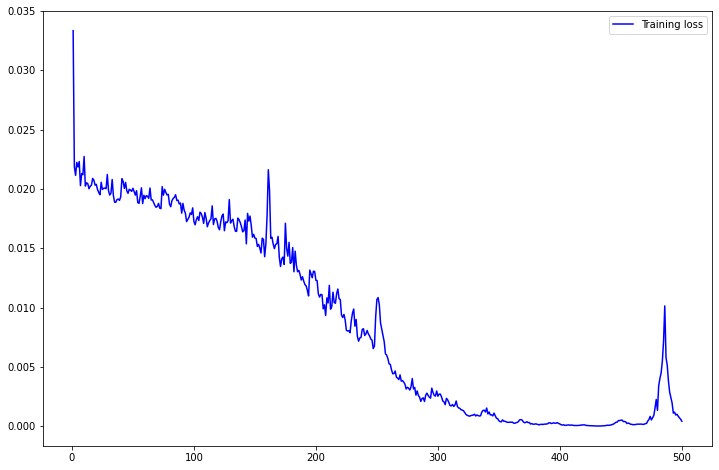

In [515]:
#print(history.history['loss'])


loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.subplots(figsize=(12,8))
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.legend()
plt.savefig("Figure/prediction/current/fire_predict_loss_512_500.jpg")
plt.show()

In [258]:
def evaluating(model, x, y) :
    
    score = model.evaluate(x,y, batch_size = 32)
    
    return score

In [314]:
score = model.evaluate(f_x_test_t,f_y_test, batch_size = 32)
print(score[0])
math.sqrt(score[0])

2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - mse: 0.0068
0.0067864214070141315


0.0823797390564824

In [128]:
import math

In [1484]:
early_stop = EarlyStopping(monitor = 'loss', patience = 50, verbose = 1)
model.fit(X_train_t, Y_train, epochs = 1000, batch_size = 32, verbose = 1)

Epoch 1/1000
6/6 [==============================] - 1s 129ms/step - loss: 0.0335
Epoch 2/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.0291
Epoch 3/1000
6/6 [==============================] - 1s 117ms/step - loss: 0.0211
Epoch 4/1000
6/6 [==============================] - 1s 117ms/step - loss: 0.0215
Epoch 5/1000
6/6 [==============================] - 1s 119ms/step - loss: 0.0223
Epoch 6/1000
6/6 [==============================] - 1s 117ms/step - loss: 0.0213
Epoch 7/1000
6/6 [==============================] - 1s 121ms/step - loss: 0.0210
Epoch 8/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.0207
Epoch 9/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.0211
Epoch 10/1000
6/6 [==============================] - 1s 120ms/step - loss: 0.0205
Epoch 11/1000
6/6 [==============================] - 1s 118ms/step - loss: 0.0211
Epoch 12/1000
6/6 [==============================] - 1s 122ms/step - loss: 0.0214
Epoch 13/1000
6/6 [======

In [1485]:
import math
score = model.evaluate(X_test_t, Y_test, batch_size = 32)
print(score)

2/2 [==============================] - 0s 6ms/step - loss: 0.0052
0.005235690623521805


In [1071]:
train_sc_df.describe()

,freq,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,192.000000,191.000000,190.000000,189.000000,188.000000,187.000000,186.000000,185.000000,184.000000,183.000000,182.000000,181.000000,180.000000
mean,0.212595,0.212994,0.213397,0.213805,0.214700,0.213904,0.215054,0.215479,0.215168,0.215847,0.216034,0.216976,0.217929
std,0.157046,0.157361,0.157678,0.157996,0.157936,0.157981,0.157621,0.157941,0.158316,0.158481,0.158898,0.158828,0.158751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.102273,0.090909,0.090909,0.113636,0.102273,0.136364,0.136364
50%,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
75%,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727,0.272727
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1072]:
test_sc_df.describe()

,freq,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,49.000000,48.000000,47.000000,46.000000,45.000000,44.000000,43.000000,42.000000,41.000000,40.000000,39.000000,38.000000,37.000000
mean,0.139147,0.138258,0.138298,0.135375,0.133333,0.131198,0.132135,0.134199,0.133038,0.130682,0.128205,0.130383,0.133907
std,0.070301,0.070766,0.071530,0.069426,0.068799,0.068070,0.068588,0.068054,0.068477,0.067646,0.066667,0.066142,0.063334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909
50%,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364,0.136364
75%,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818
max,0.272727,0.272727,0.272727,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273,0.227273


37


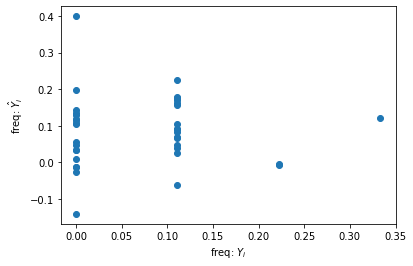

In [495]:
y_pred = model.predict(f_x_test_t, batch_size = 32)

#print(f_y_test)
plt.scatter(f_y_test, y_pred)

#z = np.polyfit(Y_test, y_pred,1)
#p = np.poly1d(z)
#plt.plot(x, p(Y_test), "r--")

print(len(y_pred))

plt.xlabel("freq: $Y_i$")
plt.ylabel("freq: $\hat{Y}_i$")
#plt.savefig("Figure/prediction/current/electrical_predict_testplot_5_3_2.jpg")

In [516]:
# getting error , mse, mae

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)) *100)

def mean_absolute_error(y_true, y_pred) :
    return np.mean(np.abs(y_true-y_pred))

def get_true_value(values) :
    true = sc.inverse_transform(values)
    return true

def forecast(values):
    predict = model.predict(values, batch_size = 32)
    
    return predict


#f_y_test, y_pred

y_pred = forecast(f_x_test_t)
#mse = mean_absolute_percentage_error(f_y_test, y_pred)
mae = mean_absolute_error(f_y_test, y_pred)

mse = mean_squared_error(f_y_test, y_pred)
#print(math.sqrt(mse))                        
#print(mean_absolute_error(true_test, pred_test))

print(mse)
print(mae)

0.006598367584946435
0.0650634236304268


In [233]:
import datetime
import configparser

print(total_train)

[[0.1681748 ]
 [0.1474284 ]
 [0.25116043]
 [0.12668199]
 [0.18892121]
 [0.1474284 ]
 [0.10593558]
 [0.10593558]
 [0.27190684]
 [0.27190684]
 [0.27190684]
 [0.1681748 ]
 [0.10593558]
 [0.20966762]
 [0.1681748 ]
 [0.18892121]
 [0.29265324]
 [0.1474284 ]
 [0.18892121]
 [0.23041402]
 [0.27190684]
 [0.1474284 ]
 [0.12668199]
 [0.25116043]
 [0.12668199]
 [0.31339965]
 [0.1474284 ]
 [0.1681748 ]
 [0.10593558]
 [0.1474284 ]
 [0.1474284 ]
 [0.1474284 ]
 [0.1474284 ]
 [0.10593558]
 [0.18892121]
 [0.23041402]
 [0.23041402]
 [0.1681748 ]
 [0.23041402]
 [0.27190684]
 [0.41713168]
 [0.27190684]
 [0.1474284 ]
 [0.1474284 ]
 [0.1474284 ]
 [0.12668199]
 [0.20966762]
 [0.1474284 ]
 [0.18892121]
 [0.1474284 ]
 [0.12668199]
 [0.1474284 ]
 [0.18892121]
 [0.12668199]
 [0.1681748 ]
 [0.1474284 ]
 [0.1681748 ]
 [0.1681748 ]
 [0.18892121]
 [0.18892121]
 [0.25116043]
 [0.25116043]
 [0.23041402]
 [0.12668199]
 [0.18892121]
 [0.35489246]
 [0.54161012]
 [0.35489246]
 [0.18892121]
 [0.31339965]
 [0.35489246]
 [0.16

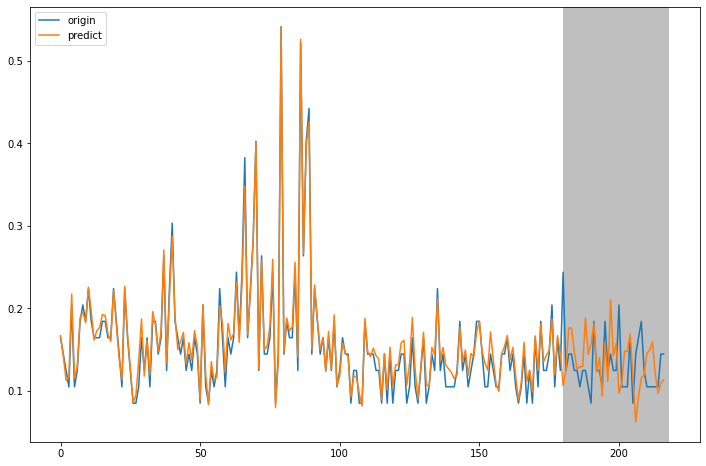

In [509]:
total_train = []
total_predict = []
pred_train = forecast(f_x_train_t)


pred_train = get_true_value(pred_train)
true_train = get_true_value(f_y_train)


pred_test = forecast(f_x_test_t)
pred_test = get_true_value(pred_test)
true_test = get_true_value(f_y_test)


total_train = np.append(true_train, true_test, 0)
total_predict = np.append(pred_train, pred_test,0)


##upto 180 -> training

dates = pd.date_range('2000-01-01', '2019-12-31', freq='M')
#x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date for d in dates]
#ax = plt.gca()

plt.subplots(figsize=(12,8))
#formatteer = mdates.DateFormatter("%Y-%m")

#ax.xaxis.set_major_formatter(formatter)
#locator = mdates.DayLocator
#ax.xaxis.set_major_locator(locator)

plt.plot(total_train, label = 'origin')
plt.plot(total_predict, label = 'predict')
plt.axvspan(180, 218, facecolor= 'gray', alpha =0.5)
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=46))
plt.legend()
plt.savefig("Figure/prediction/current/fire_predict_5_3_2.jpg")

In [140]:
predic = model.predict(f_x_train_t, batch_size = 32)
predict_pred = model.predict(f_x_test_t, batch_size = 32)

pred_train = forecast(f_x_train_t)
pred_train = get_true_value(pred_train)

true_predic = sc.inverse_transform(predic)
#print(true_predic)
true_y = sc.inverse_transform(f_y_train)
true_y_predict = sc.inverse_transform(f_y_test)
#print(true_y[:])
#plt.scatter(true_y, true_predic)

t_origin  = np.append(predic, true_y, 0)
t_predict = np.append(predict_pred, true_y_predict,0)

print(predic)
plt.plot(t_origin)
plt.plot(t_predic)


#t_predict = np.append(pred_train, true_predic, 0)
print(len(true_predic))
#fell_df['predicted'] = t_predict

TypeError: inverse_transform() missing 1 required positional argument: 'X'

## forecast

In [ ]:
test_prediction=[]

first_eval_batch = f_x_t

In [1608]:
f_train_sc

array([0.08695652])

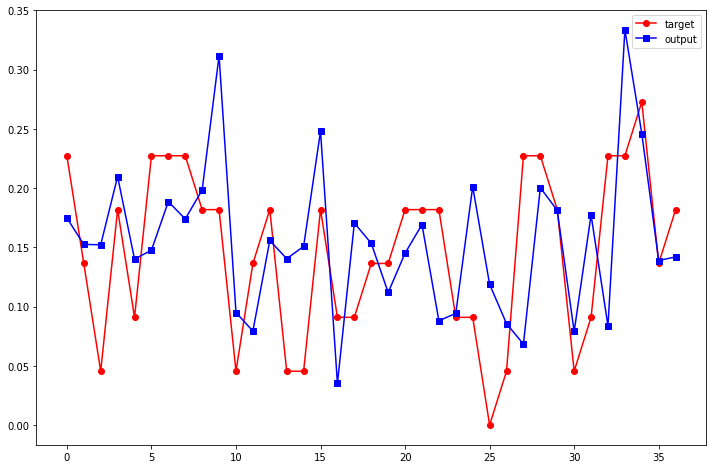

In [1527]:
plt.subplots(figsize=(12,8))
#plt.plot(Y_train[:], label="train")
plt.plot(Y_test[:],'ro-', label="target")
plt.plot(model.predict(X_test_t[:,:,:]), 'bs-', label = "output")
#model.predict(X_test_t[:,:,:]).plot(ax=ax)
plt.legend()
plt.show()

In [500]:
def predict_plot(model, x,y, cause) :
    plt.subplots(figsize=(12,8))
    plt.plot(y[:], 'ro-', label = 'target')
    plt.plot(model.predict(x[:,:,:]),'bs-',label='output')
    print(len(x), len(y))
    plt.legend()
    plt.savefig("Figure/prediction/current/"+cause+"_predict_test_5_3_2.jpg")
    plt.show()

    
def predict_scatter(model, x,y,cause) :
    y_pred = model.predict(x, batch_size =32)
    
    plt.scatter(y, y_pred)
    plt.xlabel("freq: $Y_i$")
    plt.ylabel("freq: $\hat{Y}_i$")
    plt.savefig("Figure/prediction/current/"+cause+"_predict_testplot_5_3_2.jpg")


37 37


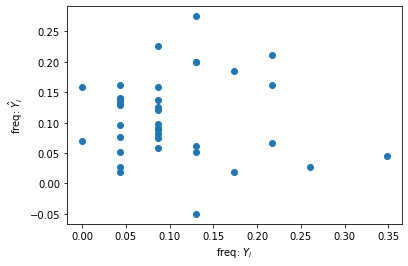

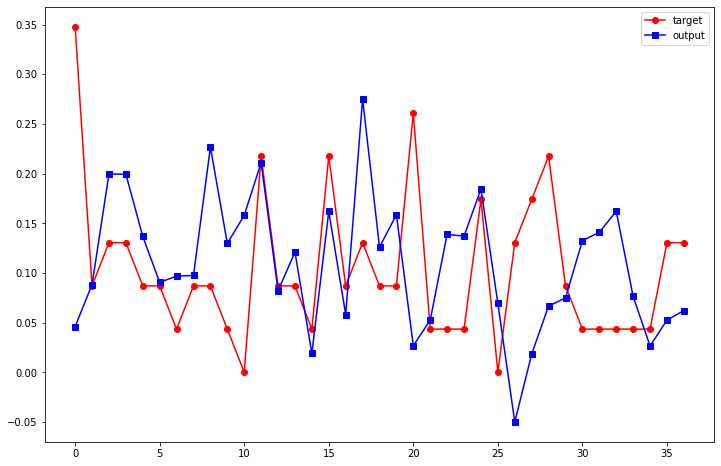

In [510]:
predict_scatter(model, f_x_test_t, f_y_test,"fire")
predict_plot(model, f_x_test_t, f_y_test, "fire")

ValueError: x and y must have same first dimension, but have shapes (250,) and (37, 1)

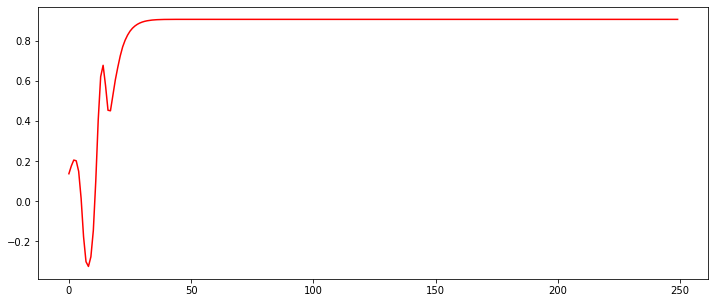

In [1095]:
look_ahead = 250
xhat = X_test_t[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[:,:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),Y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [ ]:

ax = train.plot()
test.plot(ax=ax)

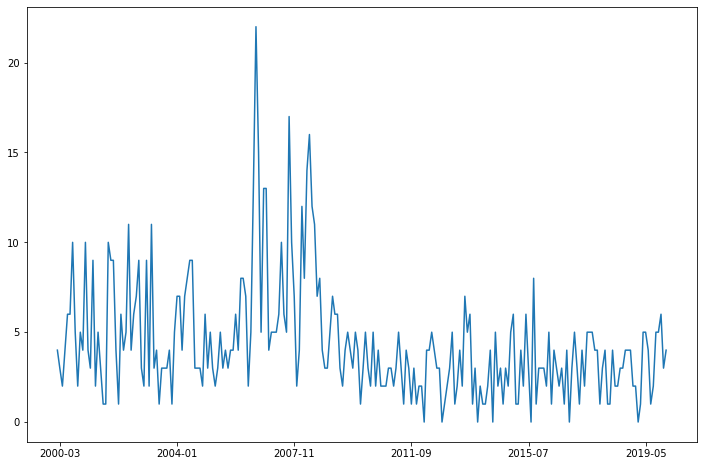

In [1002]:


dates = pd.date_range('2000-01-01', '2019-12-31', freq='M')

fig, ax= plt.subplots(figsize=(12,8))

ax.plot(dates, t_value)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=46))

save.fig



In [ ]:
#

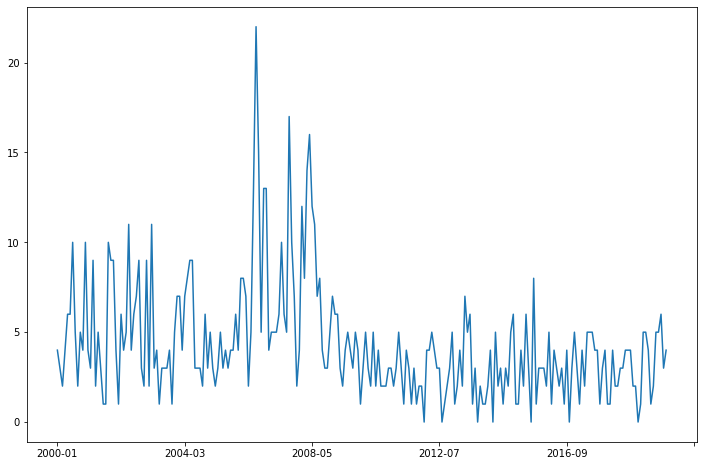

In [983]:
import numpy as np 
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime as dt



fig , ax = plt.subplots(figsize=(12,8))


ax.plot(t_value)



def listifed_formatter(x, pos=None):
    try:
        return total_list[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)

ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(0) for lab in ax.get_xticklabels()]




plt.show()



In [856]:
a = dist_yandk[2000]

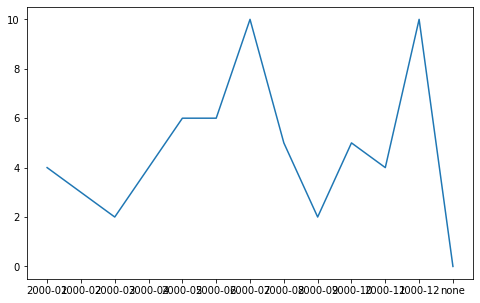

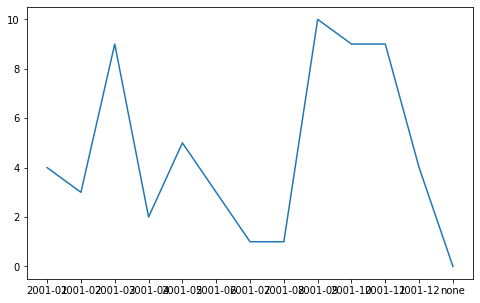

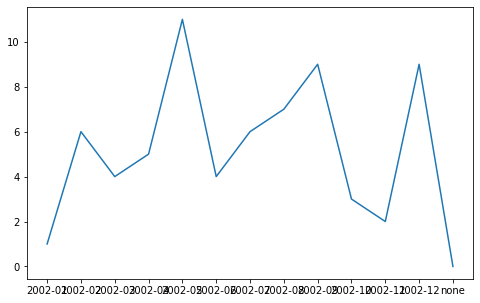

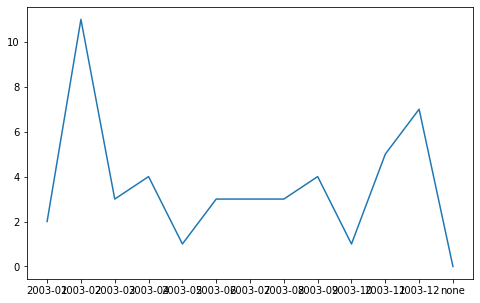

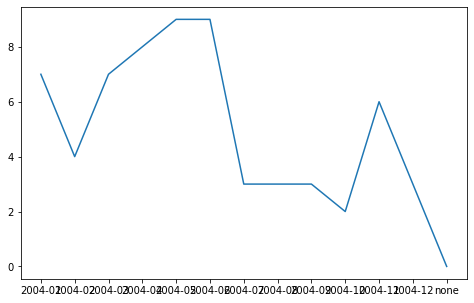

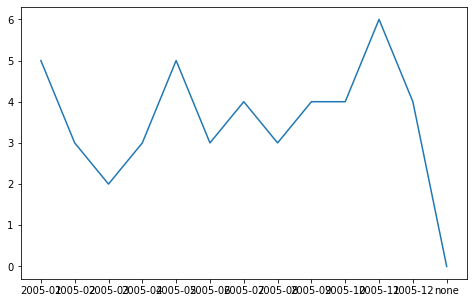

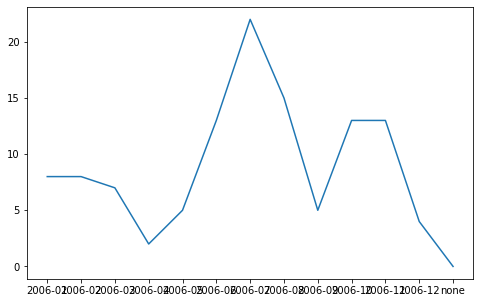

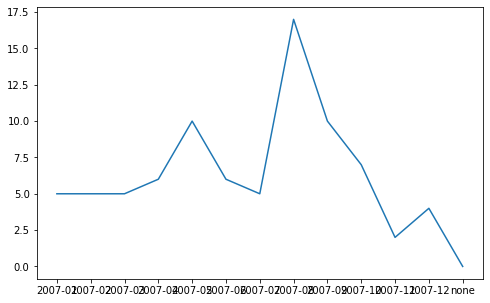

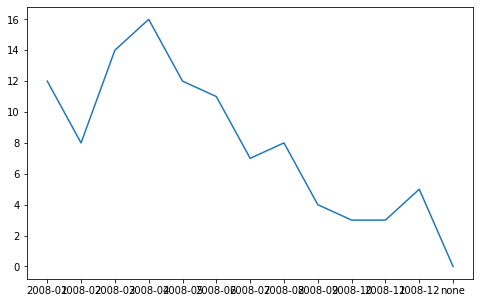

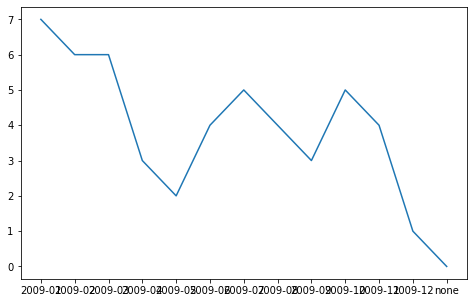

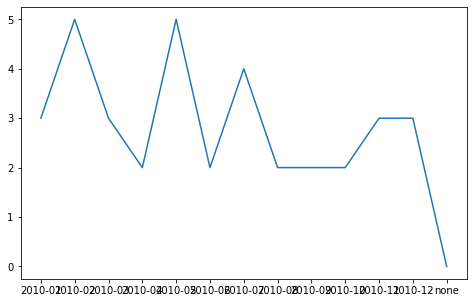

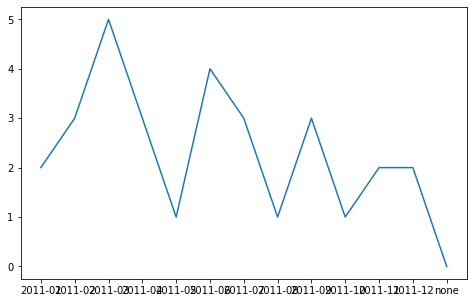

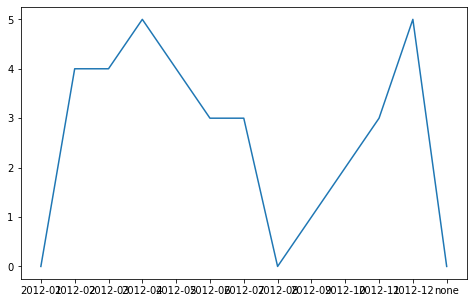

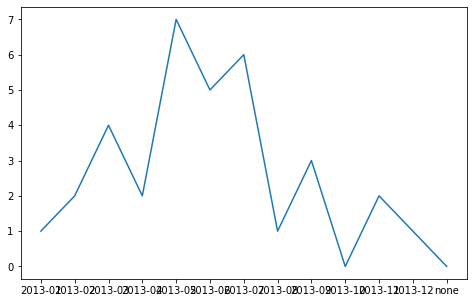

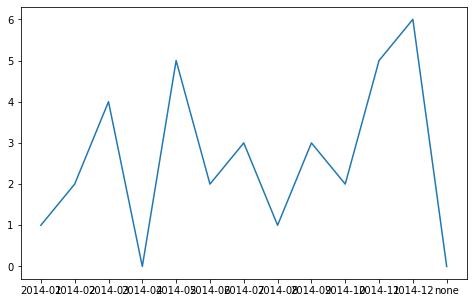

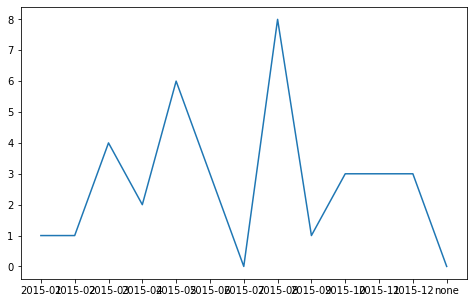

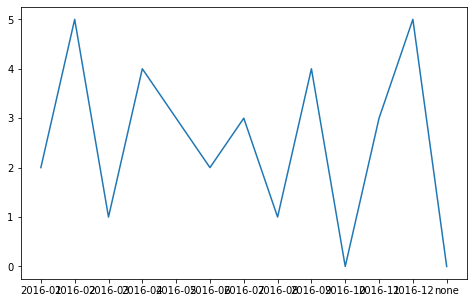

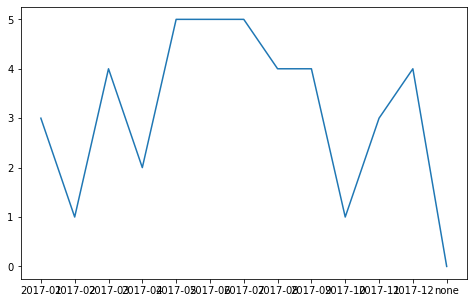

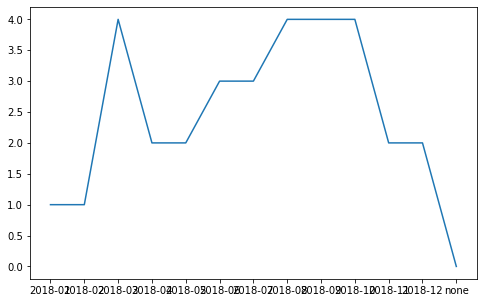

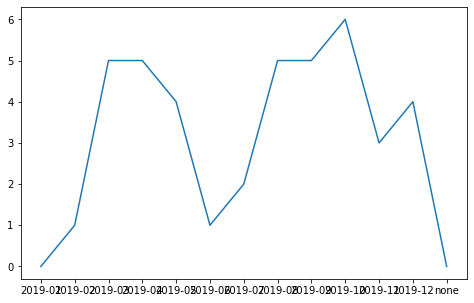

In [874]:
for yr in range(2000,2020) :
    fig, ax = plt.subplots(figsize=(8,5))
    a = dist_yandk[yr]
    ax.plot(list(a.keys()), list(a.values()))

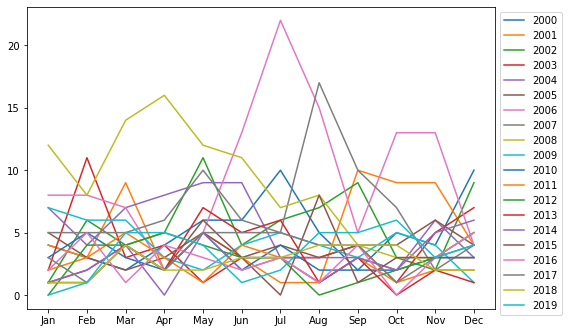

In [866]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(list(dist_yandk[2000].keys())[:-1], list(dist_yandk[2000].values())[:-1], label = '2000')
ax.plot(list(dist_yandk[2001].keys())[:-1], list(dist_yandk[2001].values())[:-1],label = '2001')
ax.plot(list(dist_yandk[2002].keys())[:-1], list(dist_yandk[2002].values())[:-1],label = '2002')
ax.plot(list(dist_yandk[2003].keys())[:-1], list(dist_yandk[2003].values())[:-1],label = '2003')
ax.plot(list(dist_yandk[2004].keys())[:-1], list(dist_yandk[2004].values())[:-1],label = '2004')
ax.plot(list(dist_yandk[2005].keys())[:-1], list(dist_yandk[2005].values())[:-1],label = '2005')
ax.plot(list(dist_yandk[2006].keys())[:-1], list(dist_yandk[2006].values())[:-1],label = '2006')
ax.plot(list(dist_yandk[2007].keys())[:-1], list(dist_yandk[2007].values())[:-1],label = '2007')
ax.plot(list(dist_yandk[2008].keys())[:-1], list(dist_yandk[2008].values())[:-1],label = '2008')
ax.plot(list(dist_yandk[2009].keys())[:-1], list(dist_yandk[2009].values())[:-1],label = '2009')
ax.plot(list(dist_yandk[2010].keys())[:-1], list(dist_yandk[2010].values())[:-1],label = '2010')
ax.plot(list(dist_yandk[2011].keys())[:-1], list(dist_yandk[2011].values())[:-1],label = '2011')
ax.plot(list(dist_yandk[2012].keys())[:-1], list(dist_yandk[2012].values())[:-1],label = '2012')
ax.plot(list(dist_yandk[2013].keys())[:-1], list(dist_yandk[2013].values())[:-1],label = '2013')
ax.plot(list(dist_yandk[2014].keys())[:-1], list(dist_yandk[2014].values())[:-1],label = '2014')
ax.plot(list(dist_yandk[2015].keys())[:-1], list(dist_yandk[2015].values())[:-1],label = '2015')
ax.plot(list(dist_yandk[2016].keys())[:-1], list(dist_yandk[2016].values())[:-1],label = '2016')
ax.plot(list(dist_yandk[2017].keys())[:-1], list(dist_yandk[2017].values())[:-1],label = '2017')
ax.plot(list(dist_yandk[2018].keys())[:-1], list(dist_yandk[2018].values())[:-1],label = '2018')
ax.plot(list(dist_yandk[2019].keys())[:-1], list(dist_yandk[2019].values())[:-1],label = '2019')

plt.legend(bbox_to_anchor=(1.0,1.0), loc='upper left')
plt.tight_layout()

## LSTM